In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from IPython.display import display
from pathlib import Path
from sklearn.model_selection import train_test_split  # type: ignore
from tensorflow import keras
from tensorflow.keras import layers  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tqdm import tqdm
from typing import Dict, List

print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

2024-06-02 13:43:16.828730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 13:43:16.828827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 13:43:16.955841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Num GPUs Available:  1


In [13]:
ds_url: str = (
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
)
ds_dir: Path = Path(
    tf.keras.utils.get_file("flower_photos", ds_url, cache_dir=".", untar=True)
)

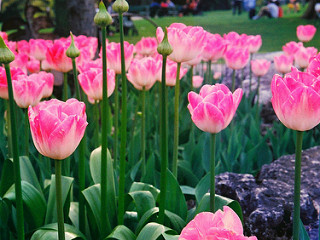

In [14]:
tulips: List[Path] = list(ds_dir.glob("tulips/*.jpg"))

with PIL.Image.open(tulips[3]) as img:
    display(img)

In [15]:
flower_images_dict: Dict[str, List[Path]] = {
    "daisy": list(ds_dir.glob("daisy/*.jpg")),
    "dandelion": list(ds_dir.glob("dandelion/*.jpg")),
    "roses": list(ds_dir.glob("roses/*.jpg")),
    "sunflowers": list(ds_dir.glob("sunflowers/*.jpg")),
    "tulips": list(ds_dir.glob("tulips/*.jpg")),
}

flower_labels_dict: Dict[str, int] = {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4,
}

In [16]:
img: np.ndarray = cv2.imread(str(flower_images_dict["roses"][0]))
img = cv2.resize(img, (180, 180))

In [17]:
X: List[np.ndarray] = []
y: List[int] = []

for flower_name, images in tqdm(flower_images_dict.items()):
    for _ in images:
        img: np.ndarray = cv2.imread(str(_))
        img = cv2.resize(img, (180, 180))

        X.append(img)
        y.append(flower_labels_dict[flower_name])

X: np.ndarray = np.array(X)
y: np.ndarray = np.array(y)

100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


In [19]:
X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = X_train / 255
X_test = X_test / 255

In [20]:
model: Sequential = Sequential(
    [
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(5),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.3633 - loss: 1.5667
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6067 - loss: 1.0175
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6733 - loss: 0.8526
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7587 - loss: 0.6545
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8416 - loss: 0.4447
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8979 - loss: 0.2926
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9387 - loss: 0.1988
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9767 - loss: 0.0926
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9768 - loss: 0.0854
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9748 - loss: 0.0881
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9897 - loss: 0.0534
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy

In [30]:
predictions: np.ndarray = model.predict(X_test)

score: tf.Tensor = tf.nn.softmax(predictions[0])
print(np.argmax(score), y_test[0])

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1 1


In [22]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6590 - loss: 2.3690


[2.3810243606567383, 0.6525885462760925]

In [75]:
data_augmentation: Sequential = keras.Sequential(
    [
        #     layers.RandomContrast((0.1, 0.3)),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom((-0.3, -0.1)),
    ]
)

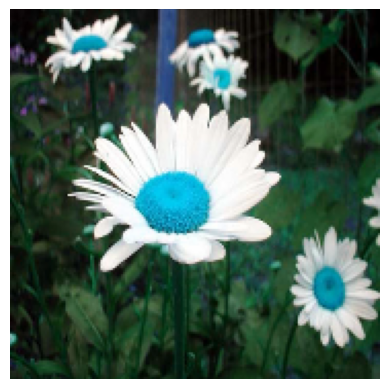

In [33]:
plt.axis("off")
plt.imshow(X[0])

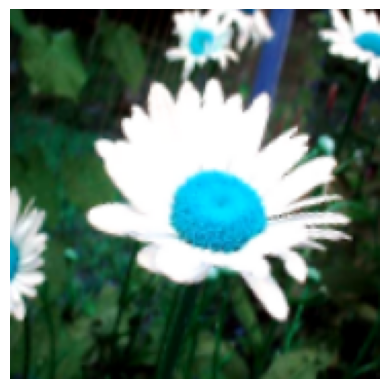

In [71]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [76]:
model: Sequential = Sequential(
    [
        data_augmentation,
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(5),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
 1/92 ━━━━━━━━━━━━━━━━━━━━ 2:57 2s/step - accuracy: 0.2188 - loss: 1.5927

2024-06-02 14:28:52.098696: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_23_1/dropout_1_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3457 - loss: 1.5836
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5641 - loss: 1.0820
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5994 - loss: 1.0073
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5976 - loss: 0.9936
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6451 - loss: 0.9150
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6531 - loss: 0.8943
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6700 - loss: 0.8747
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6936 - loss: 0.7980
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6781 - loss: 0.8452
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6954 - loss: 0.7794
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7025 - loss: 0.7646
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7144 - l

In [77]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7439 - loss: 0.7235


[0.734541654586792, 0.7343324422836304]